# **The Problem & Business Importance**





# **Data Identification & Analysis**

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [146]:
df = pd.read_csv('i4talent_dataset.csv')
df['datum'] = pd.to_datetime(df['datum'])
df['geboortedatum'] = pd.to_datetime(df['geboortedatum'])
df['indiensttreding_datum'] = pd.to_datetime(df['indiensttreding_datum'])


In [147]:
df.head()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering


In [148]:
df.describe()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,leeftijd,lengte_dienst,klant_id,STATUS_JAAR
count,49753.000000,49753,49753,49753,44653.000000,44802.000000,49753.000000,49753.000000
mean,4859.473600,2016-08-06 00:21:52.006914304,1974-01-10 05:10:34.379434400,2005-09-04 11:13:13.710530176,42.046223,10.442592,27.296525,2015.612566
min,1318.000000,2011-01-01 05:06:00,1946-01-15 05:06:00,1994-08-28 05:06:00,19.000000,0.000000,1.000000,2011.000000
25%,3360.000000,2013-12-31 05:06:00,1963-05-28 05:06:00,2000-06-01 05:06:00,31.000000,5.000000,16.000000,2013.000000
50%,5031.000000,2016-12-30 05:06:00,1973-12-04 05:06:00,2005-03-31 05:06:00,42.000000,10.000000,28.000000,2016.000000
75%,6335.000000,2018-12-31 05:06:00,1984-07-17 05:06:00,2010-10-13 05:06:00,53.000000,15.000000,42.000000,2018.000000
max,8336.000000,2020-12-30 05:06:00,1999-12-31 05:06:00,2018-12-11 05:06:00,65.000000,26.000000,46.000000,2020.000000
std,1827.113618,NaN,NaN,NaN,12.424199,6.326893,13.512861,2.845621


In [149]:
print(df.isna().sum())

WerknemerID                  0
datum                        0
geboortedatum                0
indiensttreding_datum        0
uitdiensttreding_datum       0
leeftijd                  5100
lengte_dienst             4951
stad                      5543
afdeling                  5065
klant_id                     0
geslacht_id                  0
geslacht                     0
uitdiensttreding_reden       0
uitdiensttreding_type        0
STATUS_JAAR                  0
STATUS                       0
BUSINESS_UNIT                0
dtype: int64


In [150]:
columns_categorical_with_nas = ['stad', 'afdeling']
for b in columns_categorical_with_nas:
    unique_values = df[b].value_counts()
    print(unique_values)

stad
Amsterdam              10217
Rotterdam               4661
Den Haag                3646
Utrecht                 2878
Rijswijk                2270
Haarlem                 1857
Zoetermeer              1851
Dordrecht               1823
Zaandam                 1638
Eindhoven               1400
Tilburg                 1278
Almere                  1117
Breda                   1060
Leiden                   840
Alphen aan den Rijn      826
Delft                    805
Amstelveen               733
Lelystad                 631
Schiedam                 628
Gouda                    580
Capelle                  563
Zeist                    554
Hoogeveen                497
Roermond                 467
Pijnacker                290
Woerden                  287
Middelburg               224
Barendrecht              216
Alblasserdam             213
Veenendaal               160
Name: count, dtype: int64
afdeling
Financial controller         9300
Accountant                   7779
Boekhouder            

In [151]:
df['leeftijd'] = df['leeftijd'].fillna((df['datum'] - df['geboortedatum']).dt.days // 365)
df['lengte_dienst'] = df['lengte_dienst'].fillna((df['datum'] - df['indiensttreding_datum']).dt.days // 365)
df['stad'] = df['stad'].fillna('Amsterdam')
df['afdeling'] = df['afdeling'].fillna('Financial controller')
print(df.isna().sum())

WerknemerID               0
datum                     0
geboortedatum             0
indiensttreding_datum     0
uitdiensttreding_datum    0
leeftijd                  0
lengte_dienst             0
stad                      0
afdeling                  0
klant_id                  0
geslacht_id               0
geslacht                  0
uitdiensttreding_reden    0
uitdiensttreding_type     0
STATUS_JAAR               0
STATUS                    0
BUSINESS_UNIT             0
dtype: int64


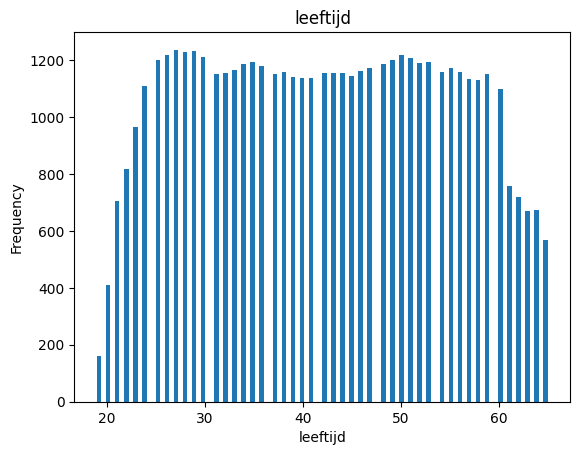

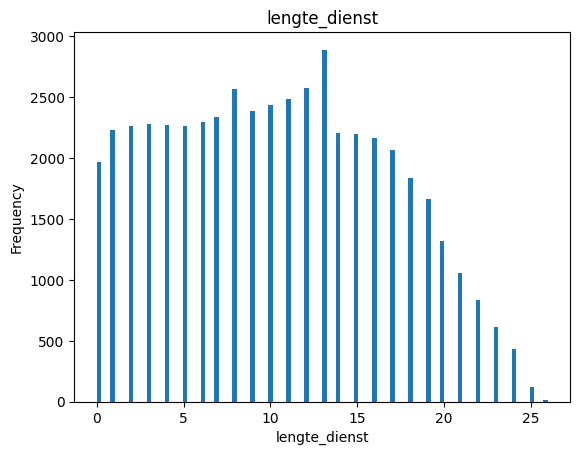

In [152]:
columns_numerical_with_nas = ['leeftijd', 'lengte_dienst']
for col in columns_numerical_with_nas:
    plt.hist(df[col], bins=100)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [153]:
columns_to_delete = ['geboortedatum', 'WerknemerID', 'uitdiensttreding_datum', 'indiensttreding_datum', 'geslacht', 'uitdiensttreding_type', 'datum', 'STATUS_JAAR', 'uitdiensttreding_reden']
df_new = df.drop(columns=columns_to_delete)


In [154]:
df_with_dummies = pd.get_dummies(df_new, columns=['stad', 'afdeling', 'geslacht_id', 'STATUS', 'BUSINESS_UNIT'], drop_first=True)
df_with_dummies

,leeftijd,lengte_dienst,klant_id,stad_Almere,stad_Alphen aan den Rijn,stad_Amstelveen,stad_Amsterdam,stad_Barendrecht,stad_Breda,stad_Capelle,...,afdeling_Financial controller,afdeling_HR,afdeling_IT,afdeling_Legal,afdeling_Marketing,afdeling_Office manager,afdeling_Project controller,geslacht_id_V,STATUS_Beëindigd,BUSINESS_UNIT_Intern
0,29.0,5.0,30,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,33.0,6.0,21,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,42.0,12.0,42,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,20.0,0.0,21,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,32.0,4.0,18,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49748,34.0,8.0,46,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
49749,20.0,0.0,44,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
49750,53.0,16.0,5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
49751,24.0,0.0,13,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


geboortedatum, WerknemerID, uitdiensttreding_datum, indiensttreding_datum, geslacht, uitdiensttreding_type

Dummies: 'stad', 'afdeling', 'geslachtID', 'uitdiensttreding_reden', 'Status', 'BUSINESS_UNIT'

In [155]:
df_with_dummies.info()
df_with_dummies['leeftijd'] = df_with_dummies['leeftijd'].astype(int)
df_with_dummies['lengte_dienst'] = df_with_dummies['lengte_dienst'].astype(int)
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49753 entries, 0 to 49752
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   leeftijd                            49753 non-null  float64
 1   lengte_dienst                       49753 non-null  float64
 2   klant_id                            49753 non-null  int64  
 3   stad_Almere                         49753 non-null  bool   
 4   stad_Alphen aan den Rijn            49753 non-null  bool   
 5   stad_Amstelveen                     49753 non-null  bool   
 6   stad_Amsterdam                      49753 non-null  bool   
 7   stad_Barendrecht                    49753 non-null  bool   
 8   stad_Breda                          49753 non-null  bool   
 9   stad_Capelle                        49753 non-null  bool   
 10  stad_Delft                          49753 non-null  bool   
 11  stad_Den Haag                       49753

In [156]:
#Used later for model evaluation
model_scores = {}

In [157]:
X = df_with_dummies.drop(columns=['STATUS_Beëindigd'])
y = df_with_dummies['STATUS_Beëindigd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [158]:

saved_model_name = 'model_lr.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_lr = loaded_model
else:
    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)
    joblib.dump(model_lr, saved_model_name)

y_pred = model_lr.predict(X_test)

train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)


model_scores['Logistic Regression'] = {
    'Train Score': train_score,
    'Test Score': test_score
}

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))



Train Score: 0.9696246419777901
Test Score: 0.9694503065018591
Accuracy: 0.9694503065018591
Confusion Matrix:
[[9643   17]
 [ 287    4]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      9660
        True       0.19      0.01      0.03       291

    accuracy                           0.97      9951
   macro avg       0.58      0.51      0.51      9951
weighted avg       0.95      0.97      0.96      9951



c:\Users\dvana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


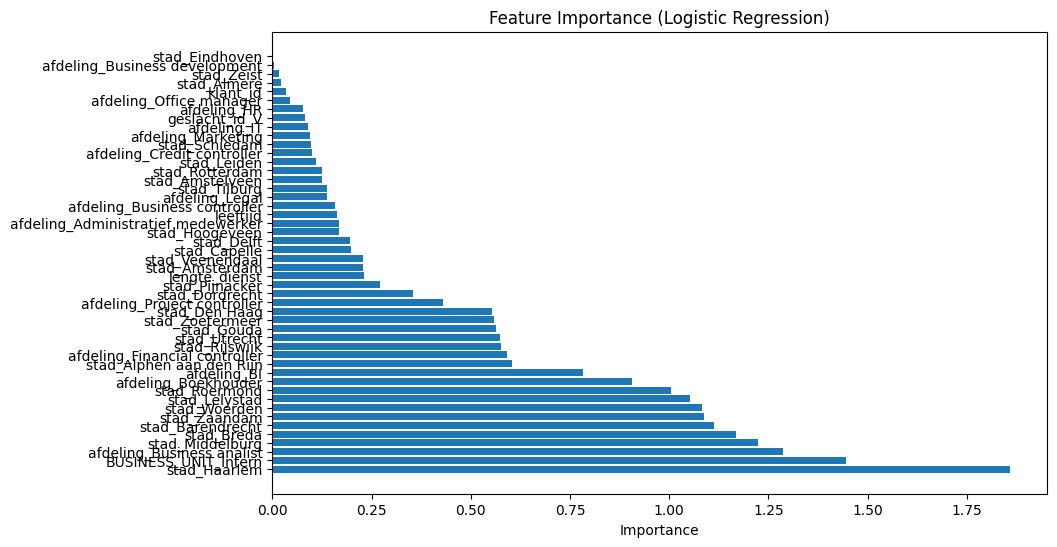

In [159]:
coefficients = model_lr.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

In [160]:
saved_model_name = 'model_lr.joblib_TUNED'

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_lr_TUNED = loaded_model
else:
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    model_lr_TUNED = grid_search.best_estimator_
    joblib.dump(model_lr, saved_model_name)

y_pred = model_lr_TUNED.predict(X_test)

train_score = model_lr_TUNED.score(X_train, y_train)
test_score = model_lr_TUNED.score(X_test, y_test)


model_scores['Logistic Regression TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score
}

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))

c:\Users\dvana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dvana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Train Score: 0.9700015074619366
Test Score: 0.9705557230429103
Accuracy: 0.9705557230429103
Confusion Matrix:
[[9658    2]
 [ 291    0]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.99      9660
        True       0.00      0.00      0.00       291

    accuracy                           0.97      9951
   macro avg       0.49      0.50      0.49      9951
weighted avg       0.94      0.97      0.96      9951



c:\Users\dvana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [161]:
saved_model_name = 'model_HGBC.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    best_model_HGBC = loaded_model

else:
    model_hgb = HistGradientBoostingClassifier()


    model_hgb.fit(X_train, y_train)
    best_model_HGBC = model_hgb
    joblib.dump(best_model_HGBC, saved_model_name)


y_pred = best_model_HGBC.predict(X_test)

train_score = best_model_HGBC.score(X_train, y_train)
test_score = best_model_HGBC.score(X_test, y_test)


model_scores['Hist Gradient Boosting'] = {
    'Train Score': train_score,
    'Test Score': test_score,
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Model Parameters: {best_model_HGBC.get_params()}")
print(classification_report(y_test, y_pred))

Train Score: 0.9879403045073112
Test Score: 0.9867350015073862
Model Parameters: {'categorical_features': 'warn', 'class_weight': None, 'early_stopping': 'auto', 'interaction_cst': None, 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_bins': 255, 'max_depth': None, 'max_features': 1.0, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 10, 'random_state': None, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9660
        True       0.95      0.57      0.72       291

    accuracy                           0.99      9951
   macro avg       0.97      0.79      0.85      9951
weighted avg       0.99      0.99      0.99      9951



In [162]:
saved_model_name = 'model_HGBC_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_HGBC_TUNED = loaded_model

else:
    model_HGBC_TUNED = HistGradientBoostingClassifier()

    param_grid = {
        'max_iter': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7, 9, 21, 25],
        'min_samples_leaf': [1, 5, 10, 15, 20],
    }

    grid_search = GridSearchCV(estimator=model_HGBC_TUNED, param_grid=param_grid,cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model_HGBC_TUNED = grid_search.best_estimator_
    joblib.dump(model_HGBC_TUNED, saved_model_name)


y_pred = model_HGBC_TUNED.predict(X_test)

train_score = model_HGBC_TUNED.score(X_train, y_train)
test_score = model_HGBC_TUNED.score(X_test, y_test)

model_scores['Hist Gradient Boosting TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Best Parameters: {grid_search.best_params_}")
print(classification_report(y_test, y_pred))

NotFittedError: This HistGradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
saved_model_name = 'model_KNN.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_knn = loaded_model
else:
    model_knn = KNeighborsClassifier()
    model_knn.fit(X_train, y_train)
    joblib.dump(model_knn, saved_model_name)

y_pred = model_knn.predict(X_test)

train_score = model_knn.score(X_train, y_train)
test_score = model_knn.score(X_test, y_test)

model_scores['KNN'] = {
    'Train Score': train_score,
    'Test Score': test_score,
}

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(classification_report(y_test, y_pred))

Train Score: 0.985352494849505
Test Score: 0.9827153049944729
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9660
        True       0.82      0.53      0.64       291

    accuracy                           0.98      9951
   macro avg       0.90      0.76      0.82      9951
weighted avg       0.98      0.98      0.98      9951



In [ ]:

saved_model_name = 'model_KNN_TUNED.joblib'

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_knn_TUNED = loaded_model
else:
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    model_knn_TUNED = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    joblib.dump(model_knn_TUNED, saved_model_name)

y_pred = model_knn_TUNED.predict(X_test)

train_score = model_knn_TUNED.score(X_train, y_train)
test_score = model_knn_TUNED.score(X_test, y_test)


model_scores['KNN TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
}

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

print(classification_report(y_test, y_pred))

Train Score: 0.9854529923119442
Test Score: 0.9828157974072957
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      9660
        True       0.88      0.48      0.62       291

    accuracy                           0.98      9951
   macro avg       0.93      0.74      0.81      9951
weighted avg       0.98      0.98      0.98      9951



In [ ]:
saved_model_name = 'model_XGBoost.joblib'


if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_xgboost = loaded_model
else:
    model_xgboost = XGBClassifier()
    model_xgboost.fit(X_train, y_train)
    print(f"Model Parameters: {model_xgboost.get_params()}")
    joblib.dump(model_xgboost, saved_model_name)

y_pred = model_xgboost.predict(X_test)

train_score = model_xgboost.score(X_train, y_train)
test_score = model_xgboost.score(X_test, y_test)


model_scores['XGBoost Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score,
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

print(classification_report(y_test, y_pred))

Train Score: 0.9872116979046279
Test Score: 0.9866345090945634
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9660
        True       0.95      0.57      0.71       291

    accuracy                           0.99      9951
   macro avg       0.97      0.78      0.85      9951
weighted avg       0.99      0.99      0.98      9951



In [ ]:


saved_model_name = 'model_XGBoost_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_xgboost_TUNED = loaded_model
else:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model_xgboost_TUNED = grid_search.best_estimator_
    print(f"Model Parameters: {model_xgboost_TUNED.get_params()}")
    joblib.dump(model_xgboost_TUNED, saved_model_name)

y_pred = model_xgboost_TUNED.predict(X_test)

train_score = model_xgboost_TUNED.score(X_train, y_train)
test_score = model_xgboost_TUNED.score(X_test, y_test)


model_scores['XGBoost Classifier TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
}

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

print(classification_report(y_test, y_pred))

Train Score: 0.9869102055173107
Test Score: 0.9869359863330318
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9660
        True       0.97      0.57      0.72       291

    accuracy                           0.99      9951
   macro avg       0.98      0.78      0.86      9951
weighted avg       0.99      0.99      0.99      9951



In [ ]:
saved_model_name = 'model_RandomForest.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_RF = loaded_model
else:
    model_RF = RandomForestClassifier(random_state=42)
    model_RF.fit(X_train, y_train)
    joblib.dump(model_RF, saved_model_name)

y_pred = model_RF.predict(X_test)

train_score = model_RF.score(X_train, y_train)
test_score = model_RF.score(X_test, y_test)


model_scores['Random Forest Classifier'] = {
    'Train Score': train_score,
    'Test Score': test_score
}

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)



Train Score: 0.9933169187478016
Test Score: 0.9844236760124611
Accuracy: 0.9844236760124611
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9660
        True       0.84      0.58      0.68       291

    accuracy                           0.98      9951
   macro avg       0.91      0.79      0.84      9951
weighted avg       0.98      0.98      0.98      9951

Confusion Matrix:
[[9628   32]
 [ 123  168]]


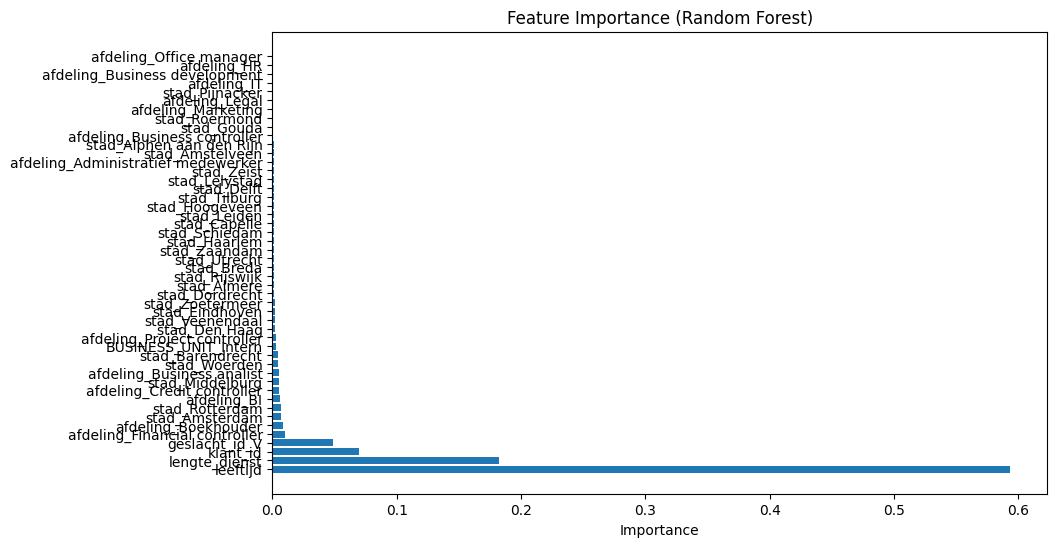

In [ ]:
importances = model_RF.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [ ]:
saved_model_name = 'model_RandomForest_TUNED.joblib'

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_RF_TUNED = loaded_model
else:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    model_RF_TUNED = grid_search.best_estimator_
    joblib.dump(model_RF_TUNED, saved_model_name)

y_pred = model_RF_TUNED.predict(X_test)

train_score = model_RF_TUNED.score(X_train, y_train)
test_score = model_RF_TUNED.score(X_test, y_test)

model_scores['Random Forest Classifier TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score
}

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)



Train Score: 0.9874378171951158
Test Score: 0.9861320470304492
Accuracy: 0.9861320470304492
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9660
        True       0.96      0.55      0.70       291

    accuracy                           0.99      9951
   macro avg       0.97      0.77      0.85      9951
weighted avg       0.99      0.99      0.98      9951

Confusion Matrix:
[[9653    7]
 [ 131  160]]


Feature Importance:
                               Feature  Importance
0                             leeftijd    0.657363
1                        lengte_dienst    0.160909
46                       geslacht_id_V    0.046149
2                             klant_id    0.042927
34                 afdeling_Boekhouder    0.010634
39       afdeling_Financial controller    0.008400
23                      stad_Rotterdam    0.006495
19                     stad_Middelburg    0.005853
33                         afdeling_BI    0.005283
28                        stad_Woerden    0.005045
6                       stad_Amsterdam    0.004923
7                     stad_Barendrecht    0.004641
35           afdeling_Business analist    0.004527
38          afdeling_Credit controller    0.003920
47                BUSINESS_UNIT_Intern    0.003434
45         afdeling_Project controller    0.002688
27                     stad_Veenendaal    0.002456
11                       stad_Den Haag    0.001596
31         

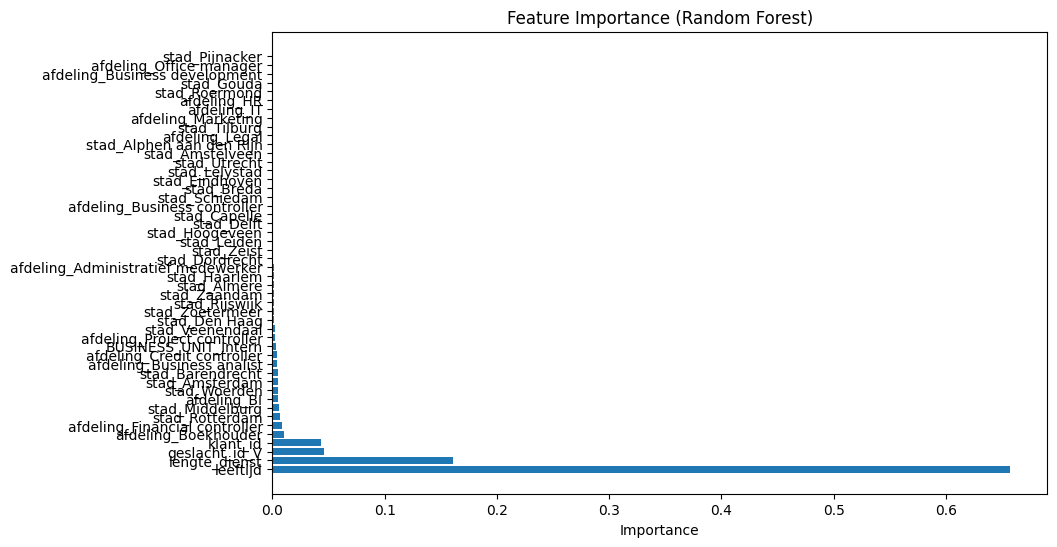

In [ ]:
importances = model_RF_TUNED.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

range(0, 10)


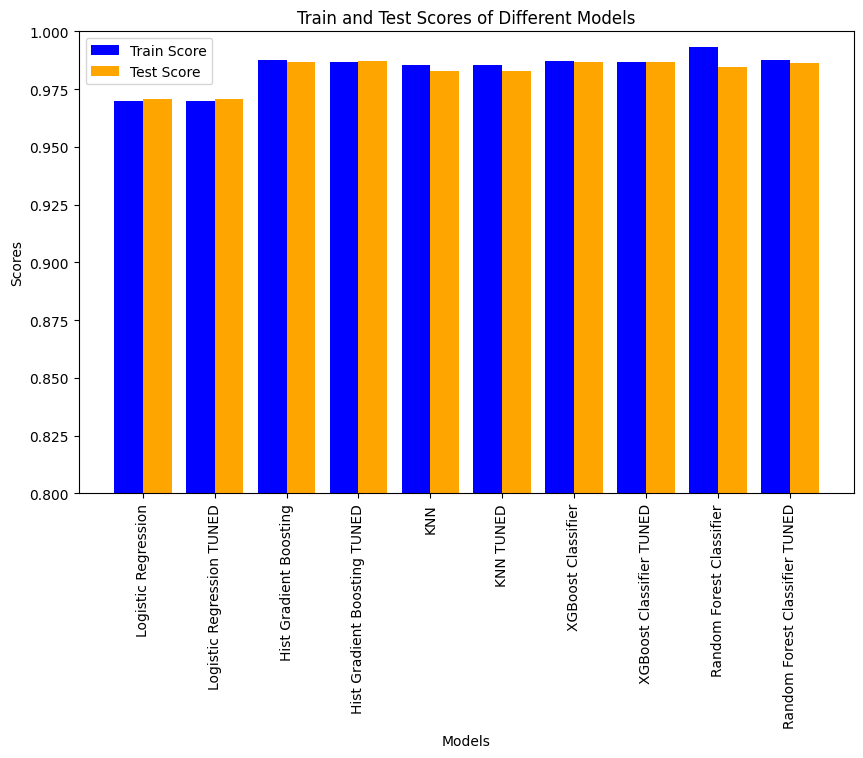

In [ ]:
models = list(model_scores.keys())
train_scores = [model_scores[model]["Train Score"] for model in models]
test_scores = [model_scores[model]["Test Score"] for model in models]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.4, label='Train Score', color='b', align='center')
plt.bar([p + 0.4 for p in x], test_scores, width=0.4, label='Test Score', color='orange', align='center')

print(x)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores of Different Models')
plt.xticks([p + 0.2 for p in x], models , rotation =90)
plt.ylim(0.8, 1)
plt.legend()
plt.show()
